<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/tensorflow2_tutorials/blob/main/digitclassifier_savemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
root='/content/drive/MyDrive/IN_Cls'
os.chdir(root)
assert root==os.getcwd()

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,Flatten,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
checklist=['CPU','GPU']
for device in checklist:
  info=tf.config.list_physical_devices(device)
  if info:
    print(f"{device} is available")
    print(f"details \ {info}")
  else:
    print(f"{device} is not available")

CPU is available
details \ [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is available
details \ [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
"""x_val=x_train_full[:5000]
y_val=y_train_full[:5000]
x_train=x_train_full[5000:]
y_train=y_train_full[5000:]
"""

'x_val=x_train_full[:5000]\ny_val=y_train_full[:5000]\nx_train=x_train_full[5000:]\ny_train=y_train_full[5000:]\n'

In [ ]:
x_val,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_val,y_train=y_train_full[:5000],y_train_full[5000:]

x_test=x_test/255.

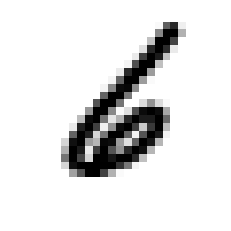

In [ ]:
plt.imshow(x_val[999],cmap='binary')
plt.axis('off')
plt.show()

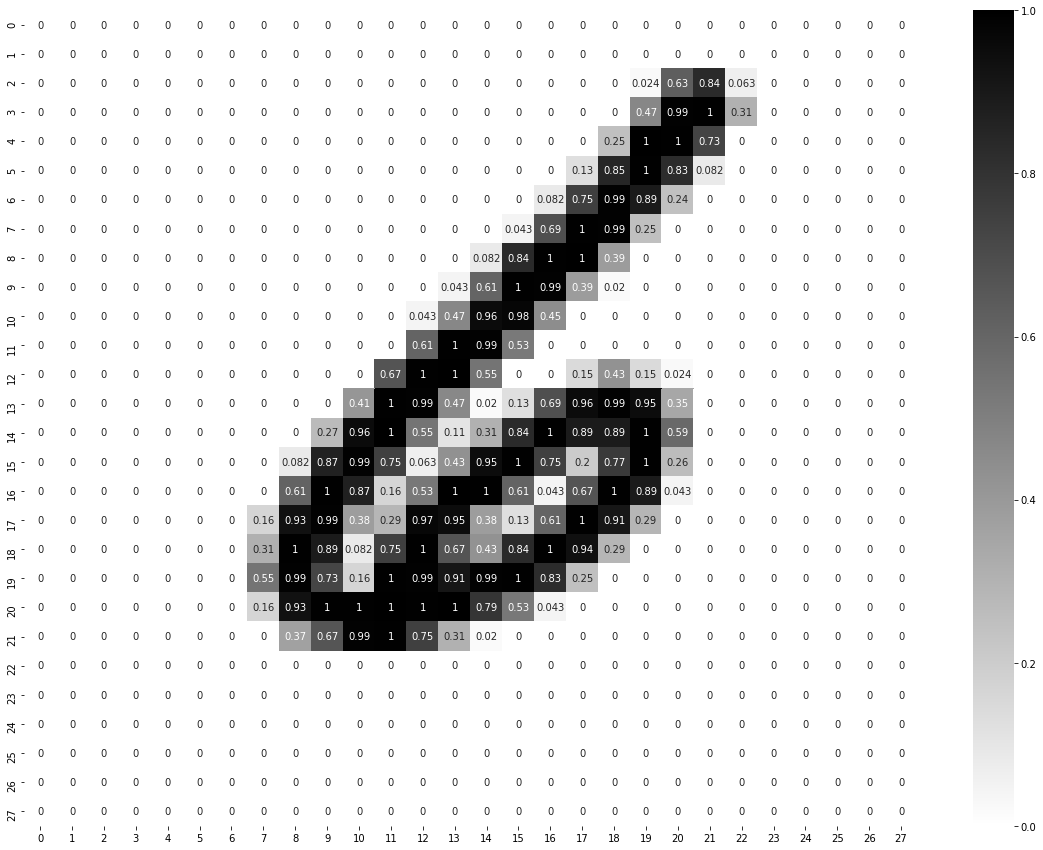

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(x_val[999],annot=True,cmap='binary')

In [ ]:
def buildModel(optimizer='adam',dropout=False,dropout_rate=0.25,weight_regularizer='l2',activation_func='relu'):
  input=Input(shape=(28,28),name='inputlayer')
  y=Flatten()(input)
  y=Dense(500,activation=activation_func,name='hidden1',kernel_regularizer=weight_regularizer)(y)
  if dropout:
    y=Dropout(rate=dropout_rate,)(y)
  y=Dense(300,activation=activation_func,name='hidden2',kernel_regularizer=weight_regularizer)(y)
  if dropout:
    y=Dropout(rate=dropout_rate,)(y)
  y=Dense(100,activation=activation_func,name='hidden3',kernel_regularizer=weight_regularizer)(y)
  if dropout:
    y=Dropout(rate=dropout_rate)(y)
  output=Dense(10,activation=tf.nn.softmax,name="output")(y)
  model=Model(input,output,name=optimizer)
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
def train_model(model_obj,epochs=30):
  history=model_obj.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))
  return pd.DataFrame(history.history)

In [ ]:
def plot_metrics(data,model_obj):
  data.plot(figsize=(8,5))
  plt.title(model_obj.name)
  plt.grid(True)
  plt.show()

In [ ]:
adam_model=buildModel()

Model: "adam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (InputLayer)      [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 500)               392500    
_________________________________________________________________
hidden2 (Dense)              (None, 300)               150300    
_________________________________________________________________
hidden3 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
________________________________________________________

In [ ]:
metrics=train_model(adam_model)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2606 - accuracy: 0.8566 - val_loss: 0.6049 - val_accuracy: 0.9264
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6154 - accuracy: 0.9162 - val_loss: 0.5190 - val_accuracy: 0.9380
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5217 - accuracy: 0.9325 - val_loss: 0.4659 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4746 - accuracy: 0.9357 - val_loss: 0.4229 - val_accuracy: 0.9516
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4382 - accuracy: 0.9416 - val_loss: 0.4196 - val_accuracy: 0.9474
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4196 - accuracy: 0.9420 - val_loss: 0.3771 - val_accuracy: 0.9542
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4024 - accuracy: 0.9430 - val_loss: 0.3744 - val_accuracy:

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.142653,0.889345,0.604918,0.9264
1,0.589826,0.920073,0.519005,0.9380
2,0.510910,0.931855,0.465931,0.9434
3,0.468039,0.935891,0.422863,0.9516
4,0.433071,0.940782,0.419608,0.9474
5,0.414044,0.941709,0.377075,0.9542
6,0.401289,0.943345,0.374415,0.9536
7,0.387718,0.945945,0.352669,0.9546
8,0.380664,0.945527,0.350017,0.9570
9,0.374594,0.946000,0.353914,0.9518


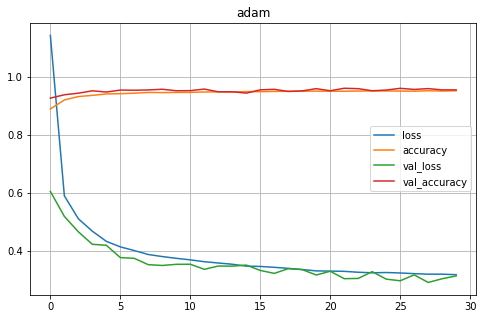

In [ ]:
plot_metrics(metrics,adam_model)

In [ ]:
import time

In [ ]:
def savedModelPath(model_dir='TRAINED_MODEL'):
  os.makedirs(model_dir,exist_ok=True)
  name=time.strftime('Model_%Y_%m_%d_%H_%M_%S_.h5')
  print(name)
  model_path=os.path.join(model_dir,name)
  print(f"you model will be save in {model_path}")
  return str(model_path)



In [ ]:
savedModelPath()

Model_2021_05_22_08_46_12_.h5
you model will be save in TRAINED_MODEL/Model_2021_05_22_08_46_12_.h5


'TRAINED_MODEL/Model_2021_05_22_08_46_12_.h5'

In [ ]:
#adam_model.save(savedModelPath())

In [ ]:
tf.keras.models.save_model(adam_model,savedModelPath())

Model_2021_05_22_08_46_12_.h5
you model will be save in TRAINED_MODEL/Model_2021_05_22_08_46_12_.h5


In [ ]:
adam_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.9535


[0.31093722581863403, 0.953499972820282]

In [ ]:
new_x=x_test[:3]
new_y=y_test[:3]
new_y_pred=np.argmax(adam_model.predict(new_x),axis=-1)

In [ ]:
new_y

In [ ]:
new_y_pred

array([7, 2, 1])

In [ ]:
adam_model.predict(new_x)

array([[1.0413989e-05, 1.4429196e-04, 5.1250774e-04, 1.6598671e-04,
        8.6650704e-07, 4.6706944e-05, 1.6798927e-08, 9.9904865e-01,
        4.1047015e-06, 6.6542474e-05],
       [8.7827444e-04, 2.5287187e-03, 9.1403389e-01, 6.9041036e-02,
        3.8596835e-07, 4.0427313e-04, 1.5242885e-04, 5.5977289e-04,
        1.2398514e-02, 2.6610796e-06],
       [5.6332281e-09, 9.9847144e-01, 2.6127000e-04, 2.7561489e-05,
        6.4287375e-04, 1.4835573e-05, 4.1863801e-05, 2.1318585e-04,
        3.2629736e-04, 7.1415252e-07]], dtype=float32)

Actual 7, Predicted 7


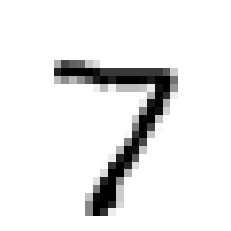

###############
Actual 2, Predicted 2


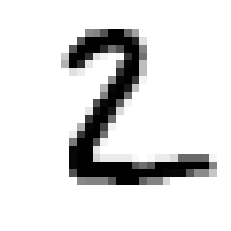

###############
Actual 1, Predicted 1


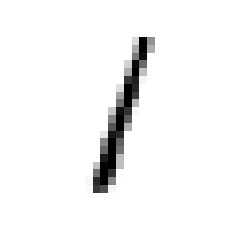

###############


In [ ]:
for a,b,c in zip(new_x,new_y,new_y_pred):
  print(f"Actual {b}, Predicted {c}")
  plt.imshow(a,cmap='binary')
  plt.axis(False)
  plt.show()
  print('###############')